# IDEB

### Libraries

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

### EDA

In [2]:
ideb = pd.read_csv("ideb.csv")

In [3]:
ideb.head(1)

,Localidade,Rede,Taxa de Aprovação - 2015,Taxa de Aprovação - 2017,Taxa de Aprovação - 2019,SAEB - 2015,SAEB - 2017,SAEB - 2019,IDEB 2015,IDEB 2017,IDEB 2019,Meta - 2015,Meta - 2017,Meta - 2019,Meta - 2021,Anos,Cod
0,Estado São Paulo,Total,"0,98","0,98","0,98","6,54","6,77","6,83","6,4","6,6","6,7","6,0","6,3","6,5","6,7",1º ao 5º ano,NaN


In [4]:
ideb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Localidade                4372 non-null   object 
 1   Rede                      4372 non-null   object 
 2   Taxa de Aprovação - 2015  2794 non-null   object 
 3   Taxa de Aprovação - 2017  4171 non-null   object 
 4   Taxa de Aprovação - 2019  4123 non-null   object 
 5   SAEB - 2015               2734 non-null   object 
 6   SAEB - 2017               4106 non-null   object 
 7   SAEB - 2019               3918 non-null   object 
 8   IDEB 2015                 2734 non-null   object 
 9   IDEB 2017                 4106 non-null   object 
 10  IDEB 2019                 3918 non-null   object 
 11  Meta - 2015               2986 non-null   object 
 12  Meta - 2017               2991 non-null   object 
 13  Meta - 2019               4298 non-null   object 
 14  Meta - 2

In [5]:
ideb.isnull().sum()

Localidade                     0
Rede                           0
Taxa de Aprovação - 2015    1578
Taxa de Aprovação - 2017     201
Taxa de Aprovação - 2019     249
SAEB - 2015                 1638
SAEB - 2017                  266
SAEB - 2019                  454
IDEB 2015                   1638
IDEB 2017                    266
IDEB 2019                    454
Meta - 2015                 1386
Meta - 2017                 1381
Meta - 2019                   74
Meta - 2021                   40
Anos                           0
Cod                           11
dtype: int64

In [6]:
miss_vals = ["na"]

In [7]:
ideb = pd.read_csv("ideb.csv", na_values = miss_vals)

In [8]:
ideb.head(3)

,Localidade,Rede,Taxa de Aprovação - 2015,Taxa de Aprovação - 2017,Taxa de Aprovação - 2019,SAEB - 2015,SAEB - 2017,SAEB - 2019,IDEB 2015,IDEB 2017,IDEB 2019,Meta - 2015,Meta - 2017,Meta - 2019,Meta - 2021,Anos,Cod
0,Estado São Paulo,Total,"0,98","0,98","0,98","6,54","6,77","6,83","6,4","6,6","6,7","6,0","6,3","6,5","6,7",1º ao 5º ano,NaN
1,Estado São Paulo,Pública,"0,97","0,98","0,98","6,38","6,60","6,62","6,2","6,5","6,5","5,8","6,1","6,3","6,6",1º ao 5º ano,NaN
2,Estado São Paulo,Privada,"0,99","0,99","0,99","7,22","7,51","7,67","7,1","7,4","7,6","7,5","7,6","7,8","7,9",1º ao 5º ano,NaN


In [9]:
ideb = ideb.applymap(lambda x: x.replace(",", ".") if isinstance(x, str) else x)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_8036/3669425328.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ideb = ideb.applymap(lambda x: x.replace(",", ".") if isinstance(x, str) else x)


In [10]:
ideb["Rede"].unique()

array(['Total', 'Pública', 'Privada', 'Estadual', 'Municipal', 'Federal'],
      dtype=object)

In [11]:
ideb["Rede"].value_counts()

Rede
Pública      1937
Estadual     1471
Municipal     927
Federal        31
Total           3
Privada         3
Name: count, dtype: int64

In [12]:
ideb.isnull().sum()

Localidade                     0
Rede                           0
Taxa de Aprovação - 2015    1578
Taxa de Aprovação - 2017     201
Taxa de Aprovação - 2019     249
SAEB - 2015                 1638
SAEB - 2017                  266
SAEB - 2019                  454
IDEB 2015                   1638
IDEB 2017                    266
IDEB 2019                    454
Meta - 2015                 1386
Meta - 2017                 1381
Meta - 2019                   74
Meta - 2021                   40
Anos                           0
Cod                           11
dtype: int64

In [13]:
ideb["rede_b"] = ideb["Rede"].map(lambda x: 0 if x == "Estadual" else (1 if x == "Municipal" else 2))

In [14]:
ideb["rede_b"].unique()

array([2, 0, 1])

In [15]:
ideb["rede_b"].value_counts()

rede_b
2    1974
0    1471
1     927
Name: count, dtype: int64

ideb_17 = ideb[["rede_b", "IDEB 2017"]]

### Filtering Dataset

I am going to use data from 2017 which is the year with the least amount of missing values.

In [16]:
ideb_17 = ideb.loc[ideb["rede_b"] != 2, ["rede_b", "IDEB 2017", 
                                        "Taxa de Aprovação - 2017",
                                        "SAEB - 2017"]]

In [17]:
ideb_17.head(3)

,rede_b,IDEB 2017,Taxa de Aprovação - 2017,SAEB - 2017
3,0,6.5,0.99,6.63
7,0,4.8,0.94,5.17
11,1,6.9,0.99,6.94


In [18]:
ideb_17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 3 to 4370
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rede_b                    2398 non-null   int64 
 1   IDEB 2017                 2158 non-null   object
 2   Taxa de Aprovação - 2017  2216 non-null   object
 3   SAEB - 2017               2158 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.7+ KB


In [19]:
ideb_17["rede_b"].value_counts()

rede_b
0    1471
1     927
Name: count, dtype: int64

In [20]:
ideb_17.isnull().sum()

rede_b                        0
IDEB 2017                   240
Taxa de Aprovação - 2017    182
SAEB - 2017                 240
dtype: int64

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='IDEB 2017', ylabel='Count'>

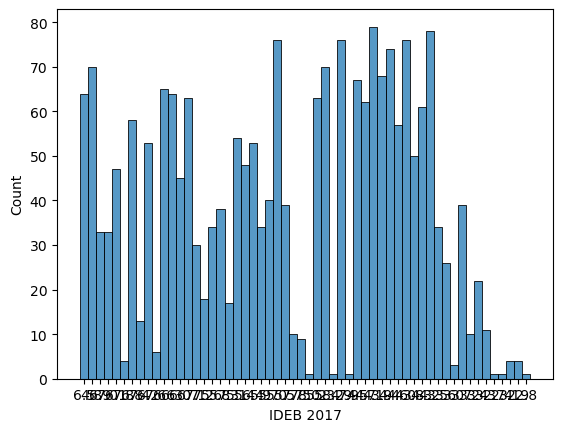

In [21]:
sns.histplot(data = ideb_17, x = "IDEB 2017")

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Taxa de Aprovação - 2017', ylabel='Count'>

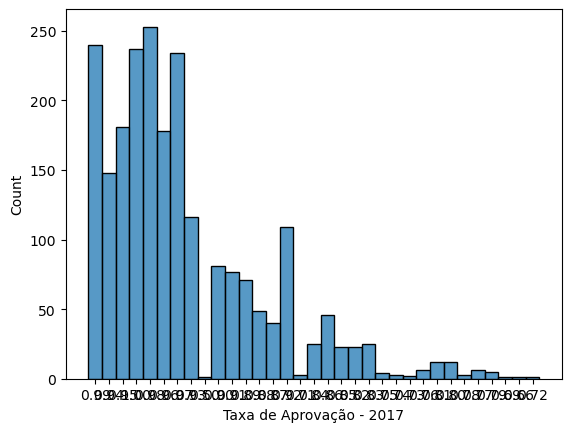

In [22]:
sns.histplot(data = ideb_17, x = "Taxa de Aprovação - 2017")

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SAEB - 2017', ylabel='Count'>

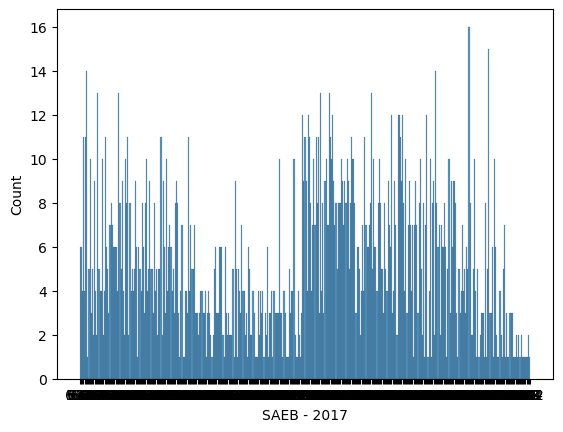

In [23]:
sns.histplot(data = ideb_17, x = "SAEB - 2017")

### Splitting the Dataset

In [24]:
y = ideb_17["rede_b"].values

In [25]:
X = ideb_17.iloc[:, [1, 2, 3]].values

### Missing Values

The imputation using the median was the first option considered due to its simplicity and for being less sensitive to outliers than the other summary statistics (Kumar, 2021). However, the dataset has a complexity that requires a more sophisticated approach. The KNN Imputer was chosen for the following reasons (Firdose):
- capturing relationships between variables;
- preserving the structure and patterns present in the data;
- and for its non-parametric approach which does not make assumptions about the data distribution.

The trade-off will be the computational complexity and the sensitive to outliers. The second one will be dealt with the l2 Normalisation (Htoon, 2020).

In [26]:
imputer = KNNImputer(n_neighbors = 5)
X = imputer.fit_transform(X)

### Normalising

In [27]:
tr = Normalizer()

X = tr.fit_transform(X)

In [28]:
ideb_17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 3 to 4370
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rede_b                    2398 non-null   int64 
 1   IDEB 2017                 2158 non-null   object
 2   Taxa de Aprovação - 2017  2216 non-null   object
 3   SAEB - 2017               2158 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.7+ KB


### K-means Clustering

In [29]:
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 12)

y_kmeans = kmeans.fit_predict(X)

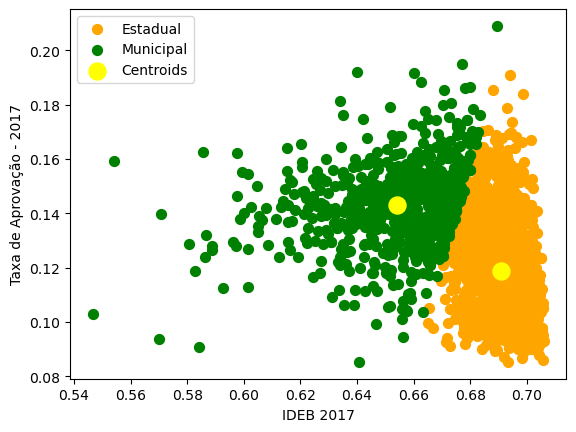

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = "orange", label = "Estadual")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = "green", label = "Municipal")

#FIRST NUMBER IS CLUSTER
#SECOND NUMBER IS MY COLUMNS 
#WHEN I STORED MY DATASET IN THE "X" I CREATED NEW COLUMNS
#SO BEFORE IT WAS COLUMNS 3 AND 5 AND NOW IT IS RESET, SO IT IS 0 AND 1


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel("IDEB 2017")
plt.ylabel("Taxa de Aprovação - 2017")

# A legend is an area describing the elements of the graph. In the matplotlib library, 
#there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

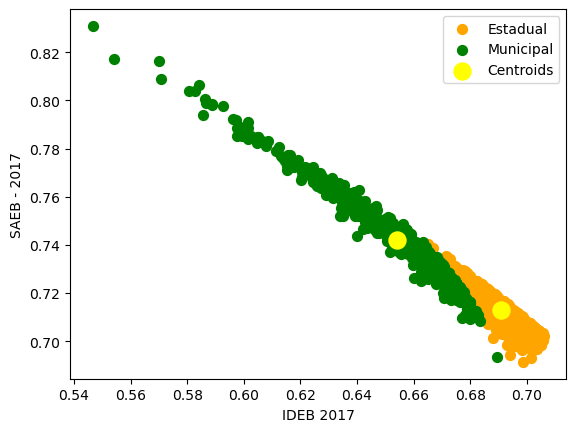

In [31]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 50, c = "orange", label = "Estadual")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 50, c = "green", label = "Municipal")

#FIRST NUMBER IS CLUSTER
#SECOND NUMBER IS MY COLUMNS 
#WHEN I STORED MY DATASET IN THE "X" I CREATED NEW COLUMNS
#SO BEFORE IT WAS COLUMNS 3 AND 5 AND NOW IT IS RESET, SO IT IS 0 AND 1


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
            s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel("IDEB 2017")
plt.ylabel("SAEB - 2017")

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

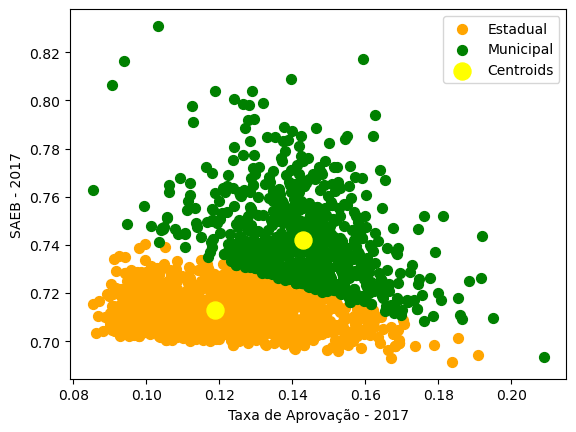

In [32]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 50, c = "orange", label = "Estadual")
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 50, c = "green", label = "Municipal")

#FIRST NUMBER IS CLUSTER
#SECOND NUMBER IS MY COLUMNS 
#WHEN I STORED MY DATASET IN THE "X" I CREATED NEW COLUMNS
#SO BEFORE IT WAS COLUMNS 3 AND 5 AND NOW IT IS RESET, SO IT IS 0 AND 1


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], 
            s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel("Taxa de Aprovação - 2017")
plt.ylabel("SAEB - 2017")

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

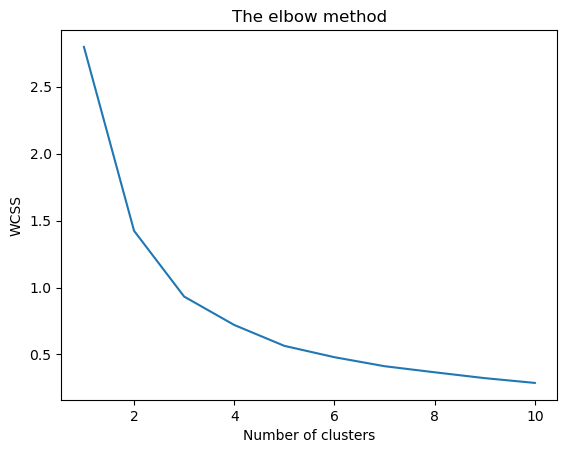

In [33]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(X)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

# DO THIS WAY TOMORROW

https://www.youtube.com/watch?v=iNlZ3IU5Ffw&t=49s